<a href="https://colab.research.google.com/github/ricardosimplicio/PUC-Rio-MVP-Analise_de_dados_e_Boas_Praticas/blob/main/MVP_Ricardo_Simplicio_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PUC-RIO  - Curso de Pós-Graduação em Ciência de Dados e Analytics**
###**Aluno: Ricardo Simplicio - ricardo.simplicio.lima@gmail.com**
###**MVP - Análise de Dados e Boas Práticas**

###**1. OBJETIVO**

O objetivo deste trabalho é obter uma análise do impacto sobre o sistema público de saúde nacional durante o período da COVID NO ANO DE 2022.
Nesta análise serão estudados os seguintes aspectos do contexto acima descrito:

a) Descrição da Notificação de leitos ao longo de 2022;

b) Distruição Ocupação dos leitos ao longo de 2022 por estado e por mês;



###**2.COLETA DE DADOS**

Os dados coletados são provenintes do Minitério da Saúde, especificamente o Registro de Ocupação de Leito Hospitalar COVID-19.

Acessar em: https://dados.gov.br/dados/conjuntos-dados/registro-de-ocupacao-hospitalar-covid-19

Estes dados são provenientes de maneira original  pela Seceretaria de Atenção  Especializada em Saúde (SAES), implementou devido à pandemia o registro de internação e  utilizando o sistema já existente chamado Sistema ESUS Notifica-Módulo Internação SUS tendo data de partida Abril-2020.

Desta forma, os dados obtidos para elaboração de deste trabalho é proveniente de um banco de dados produzido por um sistema informatizado. Logo, a inserção de dados já passa por um de validação.

Conforme informado pelo Minitério o Ano de de 2022 é aquele com novos campos em comparação aos anos anteriores do registrod e leitos da COVID-19.

O arquivo de dados utilizado é em formato .cvs:

esus-vepi.LeitoOcupacao_2022.csv

###**3. CARREGAMENTO DOS PACOTES E BIBLIOTECAS**

In [1]:
#Para Dataframes
import pandas as pd
import numpy as np
import missingno as ms

#Para Graficos
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import MinMaxScaler #normalização
from sklearn.preprocessing import StandardScaler #padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # ond-hot enconding e dummy enconding

###**4. CARREGAMENTO DADOS**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#Deixando pré-autorizado o drive
from google.colab import auth
auth.authenticate_user()

In [4]:
# Apresentando a Tabela de Atributos (Metadados)

atributos = pd.read_csv('/content/drive/My Drive/PUC_Rio/MVP-analise_de_dados/Metadados.csv', on_bad_lines='skip')
atributos.head(27).style.set_properties(**{'text-align': 'left'}).set_table_attributes('style="width:100%;"').set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}])

,Atributo,Descrição,Tipo de dados
0,Unnamed,Número de Registro,int64
1,_id,ID da Notificação,object
2,dataNotificacao,Data da Notificação,object
3,cnes,Número do Cadastro Nacional de Estabelecimento de Saúde,object
4,ocupacaoSuspeitoCli,Número de leitos ocupados com caso Suspeito em clínica médica,float64
5,ocupacaoSuspeitoUti,Número de leitos ocupados com caso Suspeito em UTI,float64
6,ocupacaoConfirmadoCli,Número de leitos ocupados com caso confirmado em clínica médica,float64
7,ocupacaoConfirmadoUti,Número de leitos ocupados com caso confirmado em UTI,float64
8,ocupacaoHospitalarUti,Número de leitos ocupados por outras enfemidades na Cidade em questão na UTI,float64
9,ocupacaoHospitalarCli,Número de leitos ocupados por outras enfemidades na Cidade em questão na clínica médica,float64


In [5]:
#carregando o arquivo e criando o dataset
leitos_covid_22 = pd.read_csv('/content/drive/My Drive/PUC_Rio/MVP-analise_de_dados/esus-vepi.LeitoOcupacao_2022.csv')

###**5. ANÁLISE EXPLORATÓRIA DE DADOS**

Verificação inicial de Dataset

In [6]:
#Apresentando o tamanho do dataset

print(f'Número de Linhas =', leitos_covid_22.shape[0])
print(f'Número de Colunas =', leitos_covid_22.shape[1])

Número de Linhas = 291920
Número de Colunas = 26


In [7]:
#Apresentenado as primeiras linhas
leitos_covid_22.head()

,Unnamed: 0,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,...,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,641508,PBGTlqtFBP,2022-01-17T03:00:00.000Z,2379341,13.0,8.0,0.0,0.0,0.0,1.0,...,parse-cloud,_User$m6WdvZgbBS,Santa Catarina,Mafra,Santa Catarina,Mafra,False,False,2021-02-15T11:08:07.797Z,2022-01-17T21:56:42.351Z
1,1275198,ipPHkH1yIB,2022-01-05T03:00:00.000Z,2594366,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$C2nTBR5lmy,Paraná,Umuarama,Paraná,Umuarama,False,False,2021-12-08T10:42:04.123Z,2022-01-05T14:17:35.799Z
2,1290474,oDyVTndNXc,2022-01-01T03:00:50.682Z,2747871,NaN,NaN,NaN,NaN,1.0,9.0,...,parse-cloud,_User$APEoiAf61c,São Paulo,Ilhabela,São Paulo,Ilhabela,False,False,2022-01-01T03:34:58.234Z,2022-01-01T03:34:58.234Z
3,1290489,cTrwNtInVV,2022-01-01T03:00:08.570Z,2082497,NaN,NaN,NaN,NaN,0.0,1.0,...,parse-cloud,_User$q0FgtTNz2d,São Paulo,Bernardino de Campos,São Paulo,Bernardino de Campos,False,False,2022-01-01T04:50:29.194Z,2022-01-01T04:50:29.194Z
4,1290490,CPkiO32WyI,2022-01-01T03:00:14.691Z,2092980,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$u4yOaQOJlf,São Paulo,Bastos,São Paulo,Bastos,False,False,2022-01-01T05:01:31.468Z,2022-01-01T05:01:31.468Z


In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
with pd.option_context('display.expand_frame_repr', False):
    print(leitos_covid_22.style.set_properties(**{'width': '100px'}))

In [9]:
#Apresentando as ultimas linhas
leitos_covid_22.tail()

,Unnamed: 0,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,ocupacaoHospitalarUti,ocupacaoHospitalarCli,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
291915,1686587,RouqeeuLHQ,2022-04-21T03:00:00.000Z,2151855,NaN,NaN,NaN,NaN,1.0,2.0,20.0,47.0,0.0,0.0,0.0,0.0,parse-cloud,_User$cmnMm8ntEF,Minas Gerais,Uberlândia,Minas Gerais,Uberlândia,False,False,2024-04-22T10:43:38.100Z,2024-04-22T10:43:38.100Z
291916,1695215,hBxDRDRJpe,2022-07-06T03:00:00.000Z,2077531,NaN,NaN,NaN,NaN,0.0,0.0,4.0,28.0,0.0,0.0,0.0,1.0,parse-cloud,_User$UCBp2db1HD,São Paulo,São Paulo,São Paulo,São Paulo,False,False,2024-07-08T10:53:20.278Z,2024-07-08T10:53:20.278Z
291917,1695216,FvK8lkY2tT,2022-07-06T03:00:00.000Z,2077531,NaN,NaN,NaN,NaN,0.0,0.0,22.0,143.0,0.0,0.0,0.0,1.0,parse-cloud,_User$UCBp2db1HD,São Paulo,São Paulo,São Paulo,São Paulo,False,False,2024-07-08T10:55:03.807Z,2024-07-08T10:55:03.807Z
291918,1695217,E4abtWBc9i,2022-07-07T03:00:00.000Z,7060165,NaN,NaN,NaN,NaN,0.0,0.0,22.0,147.0,0.0,0.0,0.0,0.0,parse-cloud,_User$UCBp2db1HD,São Paulo,São Paulo,São Paulo,São Paulo,False,False,2024-07-08T10:56:13.439Z,2024-07-08T10:56:13.439Z
291919,1699384,YSAgQNE129,2022-08-17T03:00:00.000Z,2481286,NaN,NaN,NaN,NaN,0.0,0.0,3.0,60.0,0.0,0.0,0.0,0.0,parse-cloud,_User$zIVYWMgGSH,Ceará,Fortaleza,Ceará,Fortaleza,False,False,2024-08-17T12:47:10.481Z,2024-08-17T12:47:10.481Z


In [10]:
for coluna in leitos_covid_22.columns:
    print(coluna)

Unnamed: 0
_id
dataNotificacao
cnes
ocupacaoSuspeitoCli
ocupacaoSuspeitoUti
ocupacaoConfirmadoCli
ocupacaoConfirmadoUti
ocupacaoCovidUti
ocupacaoCovidCli
ocupacaoHospitalarUti
ocupacaoHospitalarCli
saidaSuspeitaObitos
saidaSuspeitaAltas
saidaConfirmadaObitos
saidaConfirmadaAltas
origem
_p_usuario
estadoNotificacao
municipioNotificacao
estado
municipio
excluido
validado
_created_at
_updated_at


In [11]:
#Levantamento dos tipo de dados em cada coluna
leitos_covid_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291920 entries, 0 to 291919
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             291920 non-null  int64  
 1   _id                    291920 non-null  object 
 2   dataNotificacao        291920 non-null  object 
 3   cnes                   291920 non-null  object 
 4   ocupacaoSuspeitoCli    1 non-null       float64
 5   ocupacaoSuspeitoUti    1 non-null       float64
 6   ocupacaoConfirmadoCli  1 non-null       float64
 7   ocupacaoConfirmadoUti  1 non-null       float64
 8   ocupacaoCovidUti       291920 non-null  float64
 9   ocupacaoCovidCli       291920 non-null  float64
 10  ocupacaoHospitalarUti  291920 non-null  float64
 11  ocupacaoHospitalarCli  291920 non-null  float64
 12  saidaSuspeitaObitos    291920 non-null  float64
 13  saidaSuspeitaAltas     291920 non-null  float64
 14  saidaConfirmadaObitos  291920 non-nu

In [12]:
#apresentando os dados básico como um resumo inicial do dataframe leitos_covid_22
leitos_covid_22.describe()

,Unnamed: 0,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,ocupacaoHospitalarUti,ocupacaoHospitalarCli,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas
count,2.919200e+05,1.0,1.0,1.0,1.0,291920.000000,291920.000000,291920.000000,291920.000000,291920.000000,291920.000000,291920.000000,291920.000000
mean,1.444857e+06,13.0,8.0,0.0,0.0,2.045509,2.996057,9.272088,39.332013,0.120667,0.536592,0.816905,5.692104
std,8.582913e+04,NaN,NaN,NaN,NaN,7.039977,41.210772,24.810194,78.605951,2.516877,8.934880,14.115298,143.945597
min,6.415080e+05,13.0,8.0,0.0,0.0,-7.000000,-1.000000,-5.000000,-1.000000,-5.000000,-5.000000,-2.000000,-6.000000
25%,1.372392e+06,13.0,8.0,0.0,0.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1.445704e+06,13.0,8.0,0.0,0.0,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000
75%,1.518789e+06,13.0,8.0,0.0,0.0,1.000000,2.000000,10.000000,46.000000,0.000000,0.000000,0.000000,0.000000
max,1.699384e+06,13.0,8.0,0.0,0.0,300.000000,21701.000000,8191.000000,21701.000000,596.000000,3292.000000,3300.000000,9167.000000


###Tratamento de Missing


In [13]:
#vericando os nulls do dataset

print(leitos_covid_22.isnull().sum())


Unnamed: 0                    0
_id                           0
dataNotificacao               0
cnes                          0
ocupacaoSuspeitoCli      291919
ocupacaoSuspeitoUti      291919
ocupacaoConfirmadoCli    291919
ocupacaoConfirmadoUti    291919
ocupacaoCovidUti              0
ocupacaoCovidCli              0
ocupacaoHospitalarUti         0
ocupacaoHospitalarCli         0
saidaSuspeitaObitos           0
saidaSuspeitaAltas            0
saidaConfirmadaObitos         0
saidaConfirmadaAltas          0
origem                        0
_p_usuario                    0
estadoNotificacao             0
municipioNotificacao          0
estado                        0
municipio                     0
excluido                      0
validado                      0
_created_at                   0
_updated_at                   0
dtype: int64


Observar que as colunas ocupacaoSuspeitoCli, ocupacaoSuspeitoUti, ocupacaoConfirmadoCli, ocupacaoConfirmadoUti estão vazias em todoa sua totalizada, brevemente serão retirada do dataset

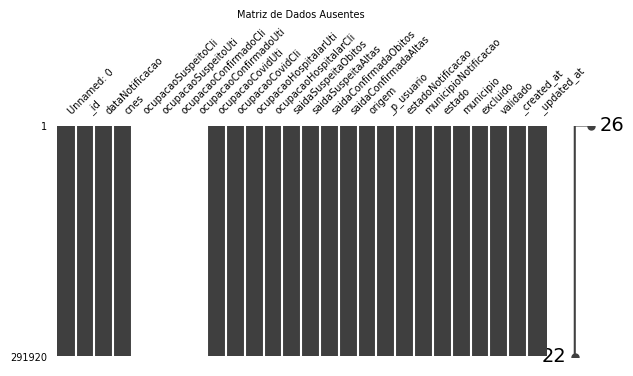

In [14]:
#Apresetando a matrix com  a verificação gráficas e vazios nas linhas e colunas
ms.matrix(leitos_covid_22, figsize=(7, 3))
plt.title('Matriz de Dados Ausentes', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()


In [15]:
#Retirando as colunas vazias

leitos_covid_22.drop(columns=['ocupacaoSuspeitoCli', 'ocupacaoSuspeitoUti', 'ocupacaoConfirmadoCli', 'ocupacaoConfirmadoUti'], inplace=True)

for coluna in leitos_covid_22.columns:
    print(coluna)

Unnamed: 0
_id
dataNotificacao
cnes
ocupacaoCovidUti
ocupacaoCovidCli
ocupacaoHospitalarUti
ocupacaoHospitalarCli
saidaSuspeitaObitos
saidaSuspeitaAltas
saidaConfirmadaObitos
saidaConfirmadaAltas
origem
_p_usuario
estadoNotificacao
municipioNotificacao
estado
municipio
excluido
validado
_created_at
_updated_at


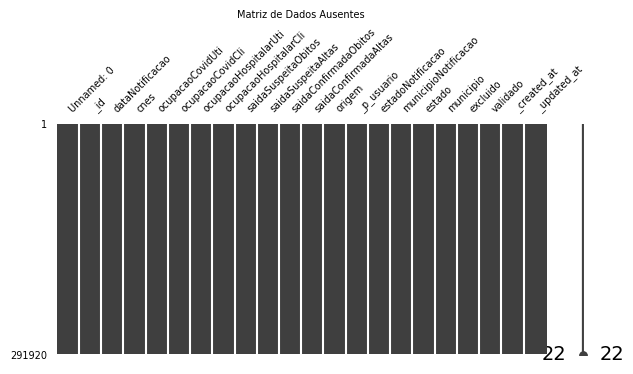

In [16]:
#Atualizando a Matriz dos Dados ausentes
ms.matrix(leitos_covid_22, figsize=(7, 3))
plt.title('Matriz de Dados Ausentes', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()



###Verificando Dupicatas

In [17]:
#verificando linhas duplicadas
duplicadas = leitos_covid_22[leitos_covid_22.duplicated()]
print(duplicadas)

Empty DataFrame
Columns: [Unnamed: 0, _id, dataNotificacao, cnes, ocupacaoCovidUti, ocupacaoCovidCli, ocupacaoHospitalarUti, ocupacaoHospitalarCli, saidaSuspeitaObitos, saidaSuspeitaAltas, saidaConfirmadaObitos, saidaConfirmadaAltas, origem, _p_usuario, estadoNotificacao, municipioNotificacao, estado, municipio, excluido, validado, _created_at, _updated_at]
Index: []


_ _ _  Logo não constam linhas duplicadas neste data frame. _ _ _

##**Descritivo Geral dos dados do Dataframe**

Avaliação inicial da quantidade de notificações por estado em 2022

In [18]:
#Tabela com a quantidades total de Notificações no Sistema ESUS Notifica-Módulo Internação SUS

notificacoes_estado = leitos_covid_22.groupby('estado')['dataNotificacao'].count().reset_index(name='quantidade_notificacoes').round(2)
media_notificacoes_por_estado = notificacoes_estado['quantidade_notificacoes'].mean().round(2)
linha_media = pd.DataFrame({'estado': ['Média'], 'quantidade_notificacoes': [media_notificacoes_por_estado]})
notificacoes_estado = pd.concat([notificacoes_estado, linha_media], ignore_index=True)
print(notificacoes_estado)

                 estado  quantidade_notificacoes
0                  Acre                   407.00
1               Alagoas                  2092.00
2                 Amapá                   395.00
3              Amazonas                  4395.00
4                 Bahia                  7664.00
5                 Ceará                 10898.00
6      Distrito Federal                  2358.00
7        Espírito Santo                  4392.00
8                 Goiás                 32325.00
9              Maranhão                  4213.00
10          Mato Grosso                  2417.00
11   Mato Grosso do Sul                 12523.00
12         Minas Gerais                 53030.00
13               Paraná                 10281.00
14              Paraíba                  1925.00
15                 Pará                  2761.00
16           Pernambuco                 13904.00
17                Piauí                  2914.00
18  Rio Grande do Norte                  4262.00
19    Rio Grande do 

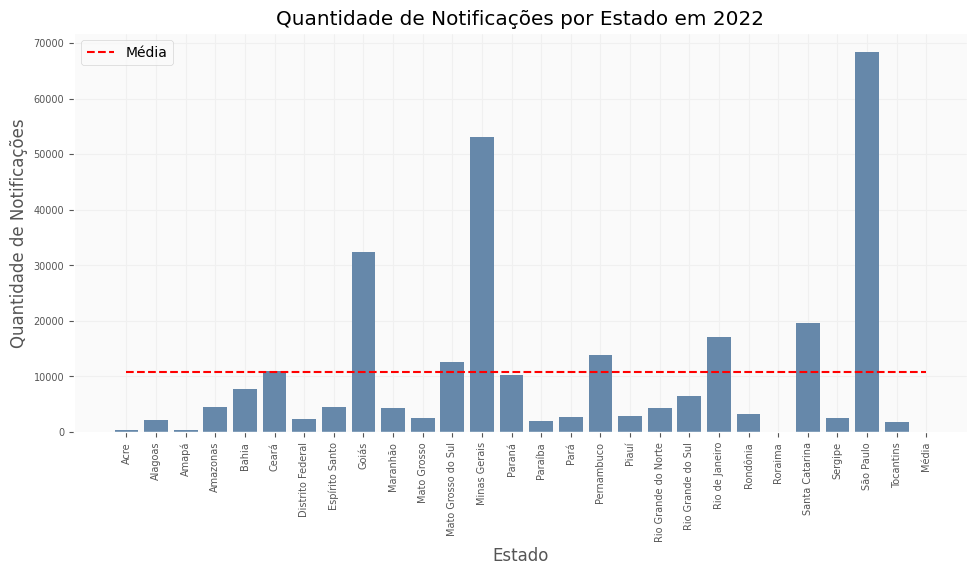

In [19]:
#Gráfico das Notificações por estado além da média
plt.style.use('ggplot')
plt.rc("axes", facecolor="#fafafa", grid=True)
plt.rc("grid", color="#f0f0f0")
corDefault = '#6688AA'
plt.figure(figsize=(10, 5))

#cores = [corDefault if estado != 'Média' else 'orange' for estado in notificacoes_estado['estado']]
notificacoes_filtradas = notificacoes_estado[notificacoes_estado['estado'] != 'Média']

plt.bar(notificacoes_filtradas['estado'], notificacoes_filtradas['quantidade_notificacoes'], color=corDefault)
plt.plot(notificacoes_estado['estado'], [media_notificacoes_por_estado] * len(notificacoes_estado), color='red', linestyle='--', label='Média')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Notificações')
plt.title('Quantidade de Notificações por Estado em 2022')
plt.tight_layout()
plt.xticks(rotation=90, fontsize=7)
plt.yticks(fontsize=7)
plt.legend()
plt.show()

In [20]:
total_notificacoes = notificacoes_estado['quantidade_notificacoes'].sum()
notificacoes_estado['porcentagem'] = ((notificacoes_estado['quantidade_notificacoes'] / total_notificacoes) * 100).round(1)
#notificacoes_estado['porcentagem'] = notificacoes_estado['porcentagem'].astype(float) + '%'
df_porcentagem = notificacoes_estado[['estado', 'porcentagem']]

df_porcentagem = df_porcentagem.sort_values(by='porcentagem', ascending=False)
estados_menores = df_porcentagem.tail(15)
soma_menores = estados_menores['porcentagem'].sum()
df_maiores = df_porcentagem.head(12)
menores_df = pd.DataFrame({'estado': ['15 Menores'], 'porcentagem': [soma_menores]})
df_maiores = pd.concat([df_maiores, menores_df], ignore_index=True)
df_maiores = df_maiores.sort_values(by='porcentagem', ascending=False)

print(df_maiores)

                estado  porcentagem
0            São Paulo         22.6
1         Minas Gerais         17.5
12          15 Menores         11.7
2                Goiás         10.7
3       Santa Catarina          6.5
4       Rio de Janeiro          5.6
5           Pernambuco          4.6
6   Mato Grosso do Sul          4.1
7                Média          3.6
8                Ceará          3.6
9               Paraná          3.4
10               Bahia          2.5
11   Rio Grande do Sul          2.2


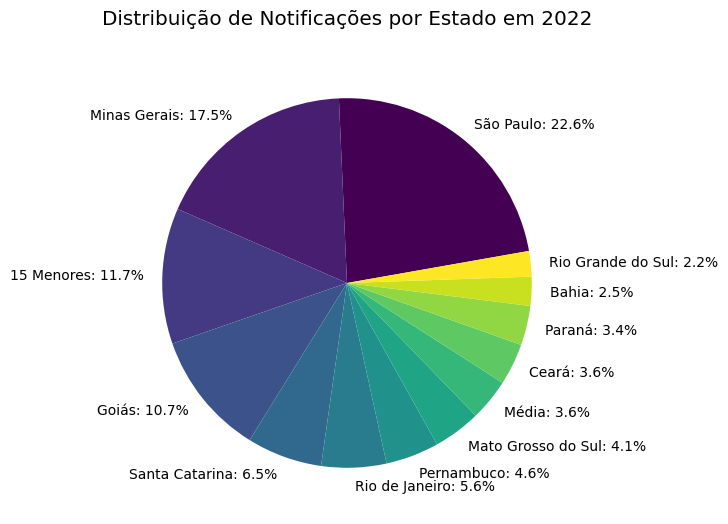

In [21]:
#Distribuição das Notificações no Ano de 2022

porcentagem = df_maiores['porcentagem']
estados = df_maiores['estado']


plt.style.use('ggplot')
plt.rc("axes", facecolor="#fafafa", grid=True)
plt.rc("grid", color="#f0f0f0")

cores = plt.cm.viridis(np.linspace(0, 1, 13))
labels = [f'{estado}: {valor:.1f}%' for estado, valor in zip(estados, porcentagem)]

plt.figure(figsize=(16, 6))
plt.pie(porcentagem, labels= labels, startangle=10, colors=cores)

plt.title('Distribuição de Notificações por Estado em 2022', pad =20)
#plt.axis('equal')
#plt.legend(estados, loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 7})
plt.show()

**Levantamento da Ocupação por Estado**

In [22]:
# Criando um novo dataframe que aabrevia o dataframe "leitos_covid_22" para apartir de então iniciar uma/
#analise prévia de ocupação de leitos ao longo do tempo e por estado

#Convertendo a coluna DataNotificação em tipo datetime com a criação de uma coluna com a mês abreviando tipo jan, fev ...
leitos_covid_22['dataNotificacao'] = pd.to_datetime(leitos_covid_22['dataNotificacao'])
leitos_covid_22['Mes'] = leitos_covid_22['dataNotificacao'].dt.strftime('%b')

#Criando o dataframe Ocupação por estado
ocupacao_por_estado = leitos_covid_22[['Mes', 'estado', 'ocupacaoCovidCli', 'ocupacaoHospitalarUti', 'ocupacaoHospitalarCli', 'ocupacaoCovidUti']]

print(f'Ocupação por Estado')
print('   ')
ocupacao_por_estado.head()



Ocupação por Estado
   


,Mes,estado,ocupacaoCovidCli,ocupacaoHospitalarUti,ocupacaoHospitalarCli,ocupacaoCovidUti
0,Jan,Santa Catarina,1.0,8.0,12.0,0.0
1,Jan,Paraná,0.0,9.0,31.0,0.0
2,Jan,São Paulo,9.0,3.0,14.0,1.0
3,Jan,São Paulo,1.0,0.0,3.0,0.0
4,Jan,São Paulo,0.0,0.0,3.0,0.0


In [23]:
meses_unicos = ocupacao_por_estado['Mes'].unique()
estados_unicos = ocupacao_por_estado['estado'].unique()
Res_Ocup_mes = pd.DataFrame(columns=['Estados'] + list(meses_unicos))
Res_Ocup_mes['Estados'] = estados_unicos

print(f'Esqueleto do Dataframe Resumo do Total da Ocupação COVID Clínica para cada Estado por Mês') # Apresentando apenas  7 colunas e 5  primeiras linhas
print('   ')
print(Res_Ocup_mes.iloc[:, :10].sort_values(by='Estados', ascending=True).head())

for estado in estados_unicos:
    for mes in meses_unicos:
        estado_dados = ocupacao_por_estado[(ocupacao_por_estado['estado'] == estado) & (ocupacao_por_estado['Mes'] == mes)]
        soma_ocupacao = estado_dados['ocupacaoCovidCli'].sum()
        Res_Ocup_mes.loc[Res_Ocup_mes['Estados'] == estado, mes] = soma_ocupacao

print('   ')
print('   ')
print(f'Dataframe Resumo do Total da Ocupação COVID Clínica para cada Estado por Mês')
print('   ')
Res_Ocup_mes.iloc[:, :7].sort_values(by='Estados', ascending=True).head() # Apresentando apenas  7 colunas e 5  primeiras linhas


Esqueleto do Dataframe Resumo do Total da Ocupação COVID Clínica para cada Estado por Mês
   
     Estados  Jan  Feb  Mar  Apr  May  Jun  Jul  Sep  Aug
18      Acre  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8    Alagoas  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
25     Amapá  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
15  Amazonas  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
13     Bahia  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
   
   
Dataframe Resumo do Total da Ocupação COVID Clínica para cada Estado por Mês
   


,Estados,Jan,Feb,Mar,Apr,May,Jun
18,Acre,685.0,886.0,189.0,182.0,0.0,0.0
8,Alagoas,1556.0,1848.0,325.0,73.0,86.0,80.0
25,Amapá,509.0,272.0,68.0,140.0,290.0,235.0
15,Amazonas,4955.0,2316.0,906.0,787.0,345.0,401.0
13,Bahia,11359.0,11200.0,5058.0,2410.0,759.0,942.0


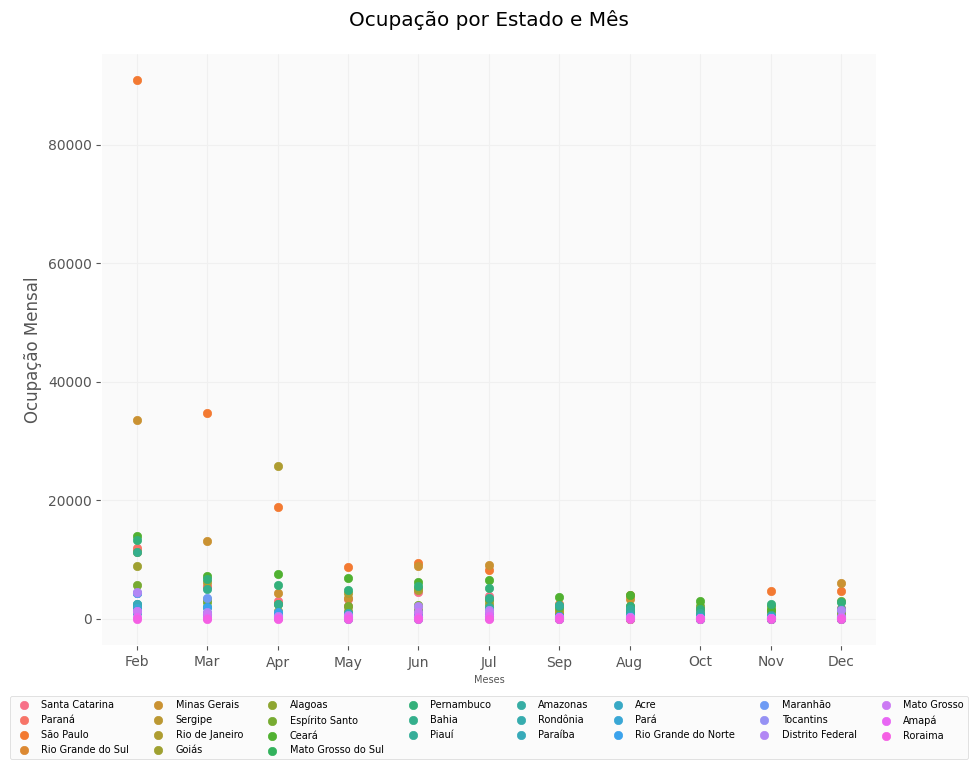

In [24]:
#Gráfico das Notificações por estado além da média

import seaborn as sns

plt.style.use('ggplot')
plt.rc("axes", facecolor="#fafafa", grid=True)
plt.rc("grid", color="#f0f0f0")
corDefault = '#6688AA'
plt.figure(figsize=(10, 4))

meses = Res_Ocup_mes.columns[2:]
nomes_estados = Res_Ocup_mes['Estados']
colors = sns.color_palette("husl", 30)

for i,estado in enumerate(Res_Ocup_mes['Estados'].unique()):
    df_estado = Res_Ocup_mes[Res_Ocup_mes['Estados'] == estado]
    ocupacao = pd.to_numeric(df_estado.iloc[0, 2:])
    plt.scatter(meses, ocupacao, label=estado, color=colors[i % 30])
    #plt.scatter(meses[estado], ocupacao[estado], color = cores[Res_Ocup_mes['Estados'][estado]])

plt.xlabel('Meses', fontsize = 7)
plt.ylabel('Ocupação Mensal')
plt.title('Ocupação por Estado e Mês', pad= 20)
plt.legend(nomes_estados, loc='lower center', bbox_to_anchor=(0.5, -0.20), ncol=8, prop={'size': 7})
plt.subplots_adjust(bottom=-.6)
plt.grid(True)
#plt.tight_layout()
plt.show()


<ipython-input-25-3f0ffacfe8fd>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_xticklabels(meses, fontsize=7)


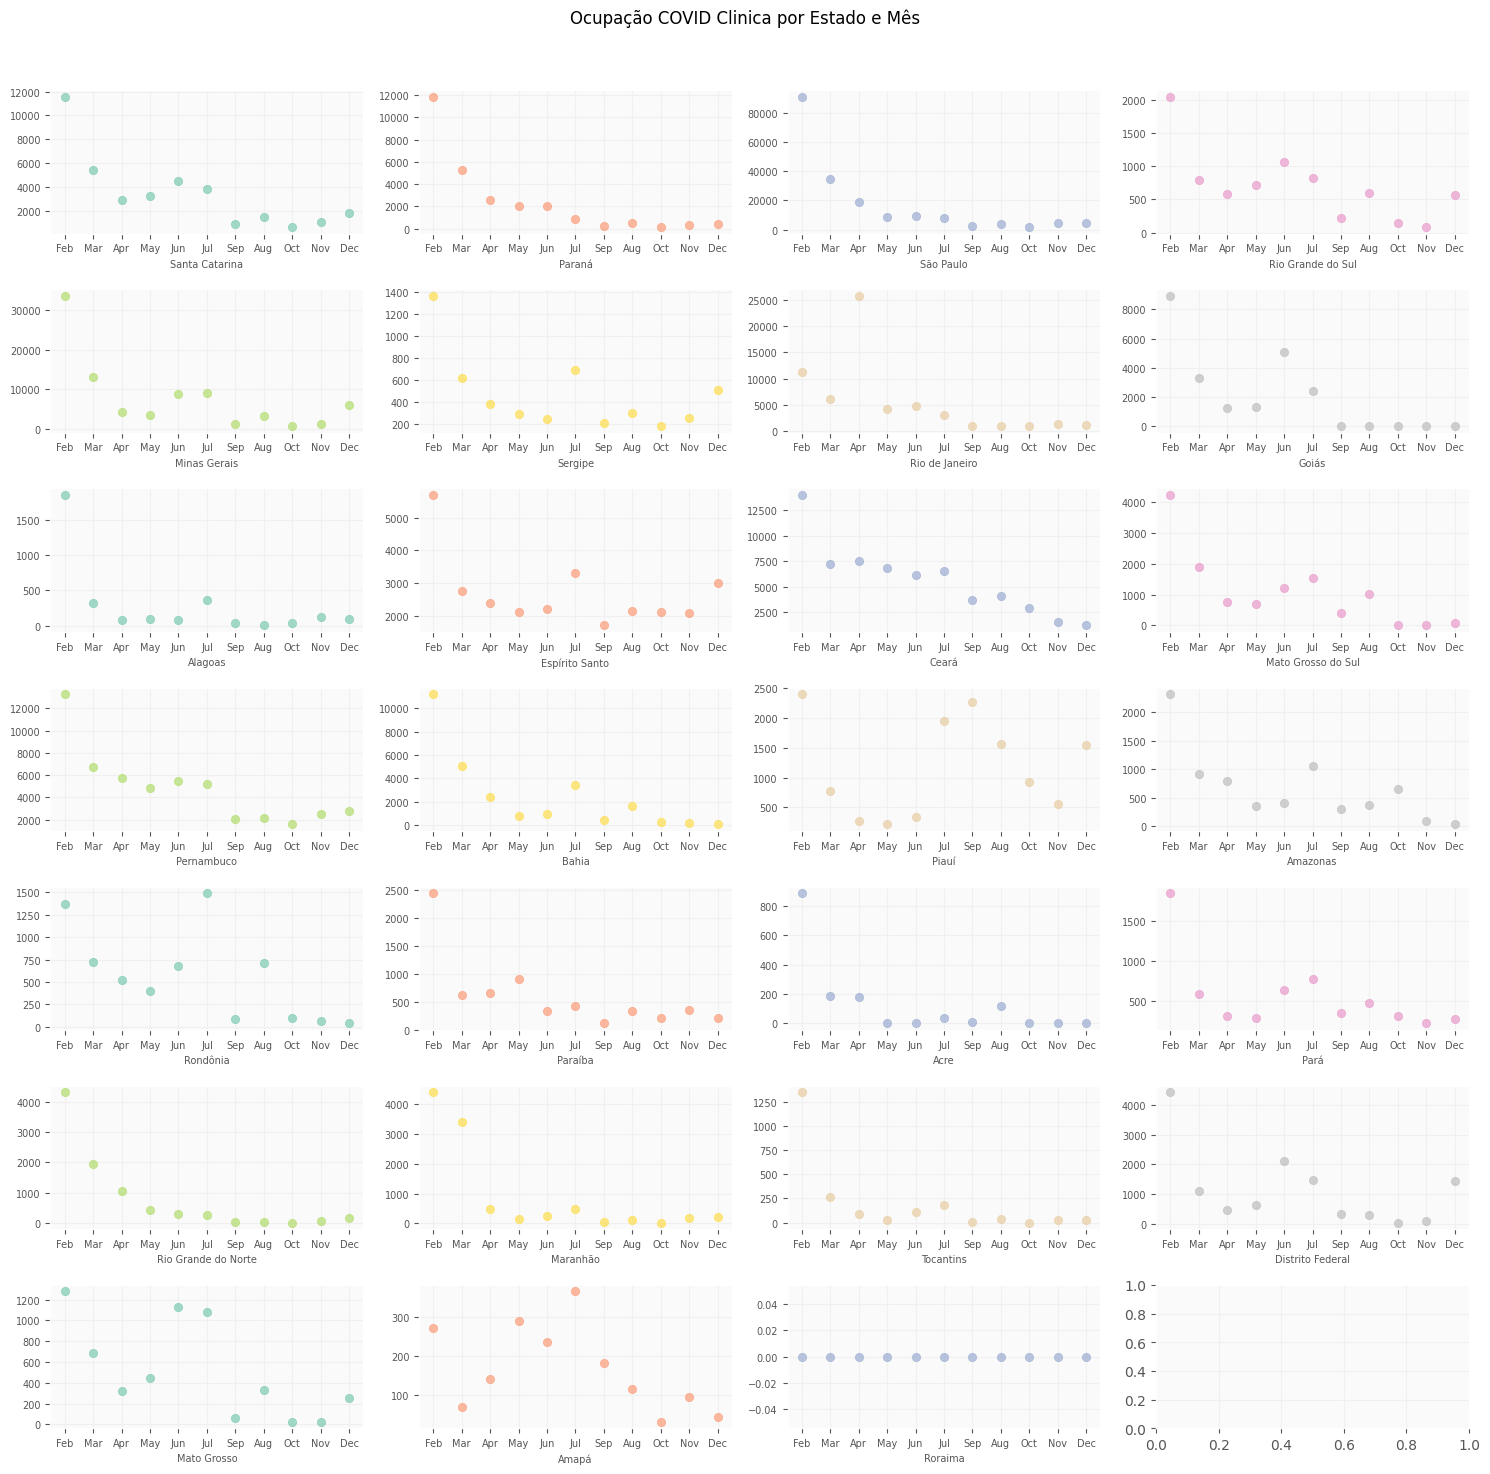

In [25]:
#Devido a baixa de qualidade desta vizualização, por motivos de evidenciar a necessidade de adequabilidade de gráficos quando se tem dados com grnde maginitude
#Por isso será apresentados os subplots
import seaborn as sns

plt.style.use('ggplot')
plt.rc("axes", facecolor="#fafafa", grid=True)
plt.rc("grid", color="#f0f0f0")
corDefault = '#6688AA'

meses = Res_Ocup_mes.columns[2:]
nomes_estados = Res_Ocup_mes['Estados']
cores = sns.color_palette("Set2", len(nomes_estados))

num_linhas = 7
num_colunas = 4

fig, ax = plt.subplots(num_linhas, num_colunas, figsize=(15, 15), sharex=False, sharey=False)
plt.suptitle('Ocupação COVID Clinica por Estado e Mês', fontsize=12)
plt.grid(True)

for i in range(num_linhas):
    for j in range(num_colunas):
        idx = i * num_colunas + j
        if idx < len(nomes_estados):
            estado = nomes_estados[idx]
            # Filtra os dados para o estado atual
            df_estado = Res_Ocup_mes[Res_Ocup_mes['Estados'] == estado]
            ocupacao = pd.to_numeric(df_estado.iloc[0, 2:])  # Acessa a ocupação
            ax[i, j].scatter(meses, ocupacao, alpha=0.6, color=cores[idx])
            ax[i, j].set_xlabel(estado, fontsize=7)
            ax[i, j].set_xticklabels(meses, fontsize=7)
            ax[i, j].tick_params(axis='y', labelsize=7)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Avalização de Ocupação por Mês

In [26]:
#Chamada do Datafram  Resumo Ocupação Clinica por mês e por Estado

print(f'Dataframe Resumo do Total da Ocupação COVID Clínica para cada Estado por Mês')
print('   ')
print(Res_Ocup_mes.iloc[:, :8].sort_values(by='Estados', ascending=True).head()) # Apresentando apenas  7 colunas e 5  primeiras linhas

Dataframe Resumo do Total da Ocupação COVID Clínica para cada Estado por Mês
   
     Estados      Jan      Feb     Mar     Apr    May    Jun     Jul
18      Acre    685.0    886.0   189.0   182.0    0.0    0.0    35.0
8    Alagoas   1556.0   1848.0   325.0    73.0   86.0   80.0   365.0
25     Amapá    509.0    272.0    68.0   140.0  290.0  235.0   365.0
15  Amazonas   4955.0   2316.0   906.0   787.0  345.0  401.0  1062.0
13     Bahia  11359.0  11200.0  5058.0  2410.0  759.0  942.0  3398.0


In [66]:
total_mes = pd.DataFrame(columns=['Meses', 'Total', 'Média Geral'])

dados_somados = pd.DataFrame({'Meses': Res_Ocup_mes.columns[1:],
                              'Total': Res_Ocup_mes.iloc[:, 1:].sum()
                              })
dados_media = pd.DataFrame({'Meses': dados_somados['Meses'].index,
                            'Média': dados_somados['Total'].mean().round(2)
                            })

total_mes = pd.merge(dados_somados, dados_media, on='Meses')

print(total_mes)

   Meses     Total     Média
0    Jan  176205.0  72884.08
1    Feb  248902.0  72884.08
2    Mar  104774.0  72884.08
3    Apr   80740.0  72884.08
4    May   43566.0  72884.08
5    Jun   58643.0  72884.08
6    Jul   58736.0  72884.08
7    Sep   18518.0  72884.08
8    Aug   26844.0  72884.08
9    Oct   13733.0  72884.08
10   Nov   17243.0  72884.08
11   Dec   26705.0  72884.08


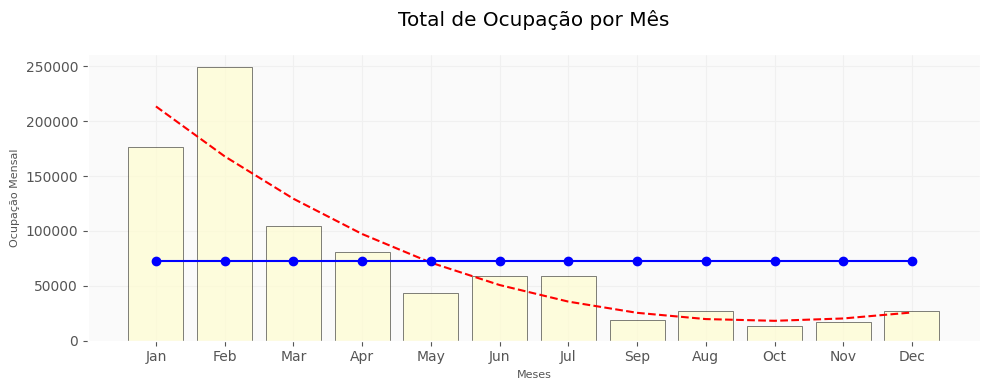

In [77]:
#importante numpy
import numpy as np

#Configuração incial de cores e grids
plt.style.use('ggplot')
plt.rc("axes", facecolor="#fafafa", grid=True)
plt.rc("grid", color="#f0f0f0")
corDefault = '#6688AA'
plt.figure(figsize=(10, 4))


#Parâmetros da Linha de Tendência
total_mes['Total'] = pd.to_numeric(total_mes['Total'], errors='coerce')
total_mes['Média'] = pd.to_numeric(total_mes['Média'], errors='coerce')
meses_num = np.arange(len(total_mes))
z = np.polyfit(meses_num, total_mes['Total'], 3)
p = np.poly1d(z)

#Plotando
plt.plot(total_mes['Meses'], p(meses_num), color='red', linestyle='--', label='Linha de Tendência')
plt.bar(total_mes['Meses'],total_mes['Total'], label="Total Ocupações", color='#FFFDD0', edgecolor='black', alpha=0.7)
plt.plot(total_mes.index, total_mes['Média'], color="blue", label = "Média Anual", marker='o')

#Fontes e Rótulos
fonte=8
plt.xlabel('Meses', fontsize = fonte)
plt.ylabel('Ocupação Mensal', fontsize = fonte)
plt.title('Total de Ocupação por Mês', pad= 20)
plt.subplots_adjust(bottom=-.15)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Ocupações totais por mês
total_mes = pd.DataFrame(columns=['Meses', 'Total'])
dados_total = Res_Ocup_mes.iloc[:, 1:].sum()
total_mes.loc[0] = pd.concat[dados_total[0]]
total_mes.loc[1] = pd.concat[dados_total[1]]

total_mes.head()
print(dados_total)
